<a href="https://colab.research.google.com/github/cmoya92/neural_networks/blob/master/Classifying_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFYING MOVIE REVIEWS

### 1.Loading DataSet

In [0]:
!pip install numpy==1.16.1
import numpy as np

In [0]:
#Loading IMDB Dataset
from keras.datasets import imdb

(X_train,y_train), (X_test,y_test) = imdb.load_data(num_words=10000)

In [0]:
type(X_train)
max([max(sequence) for sequence in X_train]) # We restricted to the top 10000 words

9999

In [0]:
# Get the comments (Reverse)
word_index= imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_review= ' '.join(reverse_word_index.get(i-3,'?') for i in X_train[0])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
word_index["fawn"]

34701

### 2. Preparing the data (Turn lists into tensors)

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros ((len(sequences), dimension)) # creates an all zero matriz of shape of (len(sequences)), dimension. 
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1. # Sets specific indices of result i to 1s.
  return results


In [0]:
print(len(vectorize_sequences(X_train)[0]))
print(len(X_train[0]))

10000
218


In [0]:
X_train_vectorized = vectorize_sequences(X_train)
X_test_vectorized = vectorize_sequences(X_test)

In [0]:
y_train_vectorized= np.asarray(y_train).astype('float32')
y_test_vectorized = np.asarray(y_test).astype('float32')

In [0]:
print(type(y_train))
print(type(y_train_vectorized))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
x_val = X_train_vectorized[:10000] # Split validation 
partial_x_train = X_train_vectorized[10000:]

y_val = y_train_vectorized[:10000]
partial_y_train = y_train_vectorized[10000:]

In [0]:
print(len(x_val))
print(len(partial_x_train))

10000
15000


### 2.2 Preprocessing V2

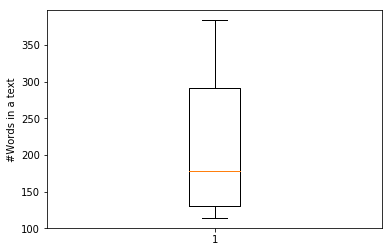

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([len(text) for text in X_train], whis=[15, 85], showfliers=False)
plt.ylabel("#Words in a text")
plt.show()

In [0]:
from keras.preprocessing.sequence import pad_sequences 
from keras.utils import to_categorical
  
maxsequence = 400
X_train_s = pad_sequences(X_train, maxlen=maxsequence)
X_test_s = pad_sequences(X_test, maxlen=maxsequence)



In [0]:
x_val2 = X_train_s[:10000] # Split validation 
partial_x_train2 = X_train_s[10000:]

y_val2 = y_train[:10000]
partial_y_train2 = y_train[10000:]

In [0]:
from keras import models
from keras import layers
from keras import metrics
from keras import optimizers

model = models.Sequential()
model.add(layers.Embedding(10000, 64, input_length=maxsequence))#We will transform each index (word) into an embedding vector of 64 elements, which will be learned by the network.
model.add(layers.GlobalAveragePooling1D()) #After the embedding we will add the averaging layer to obtain a single vector of values representing the whole document.
model.add(layers.Dense(32, activation= "relu"))
model.add(layers.Dense(16, activation= "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = optimizers.rmsprop(lr=0.0005), loss= "binary_crossentropy", metrics= ["acc"])

model.summary()

history= model.fit(partial_x_train2,partial_y_train2,epochs = 20, batch_size= 512, validation_data=(x_val2,y_val2))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 400, 64)           640000    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 642,625
Trainable params: 642,625
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 272us/step - loss: 0.6915

In [0]:
results = model.evaluate(X_test_s,y_test)
results

25000/25000 [==============================] - 1s 51us/step


[0.30012811268806455, 0.87964]

### 3. Model

In [0]:
from keras import models
from keras import layers
from keras import metrics
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation= "relu", input_shape= (10000,)))
model.add(layers.Dense(16, activation= "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = optimizers.rmsprop(lr=0.001), loss= "binary_crossentropy", metrics= ["acc"])

model.summary()

history= model.fit(partial_x_train,partial_y_train,epochs = 4, batch_size= 512, validation_data=(x_val,y_val))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_29 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 270us/step - loss: 0.5341 - acc: 0.7898 - val_loss: 0.4086 - val_acc: 0.8690
Epoch 2/4
15000/15000 [==============================] - 3s 217us/step - loss: 0.3275 - acc: 0.8989 - val_loss: 0.3165 - val_acc: 0.8851
Epoch 3/4
15000/15000 [==============================] - 3s 217us/step - los

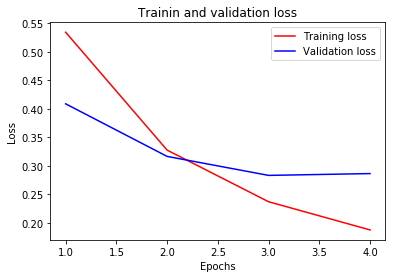

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values= history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs,loss_values,"b", color = "red", label = "Training loss")
plt.plot(epochs,val_loss_values,"b",label = "Validation loss")
plt.title("Trainin and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


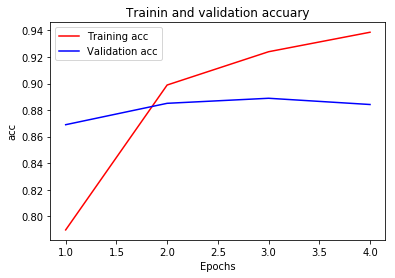

In [0]:
acc_values= history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs,acc_values,"b", color = "red", label = "Training acc")
plt.plot(epochs,val_acc_values,"b",label = "Validation acc")
plt.title("Trainin and validation accuary")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [0]:
results = model.evaluate(X_test_vectorized,y_test_vectorized)
results

25000/25000 [==============================] - 2s 76us/step


[0.30144216868400575, 0.87708]

In [0]:
model.predict(X_test_vectorized)

array([[0.33915335],
       [0.9996277 ],
       [0.93349445],
       ...,
       [0.14614403],
       [0.19091243],
       [0.6459974 ]], dtype=float32)